In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path="dataset"

In [5]:
target=[]
data=[]
image=[]

# Preprocessing of Data

In [6]:
for dirpath,dirname,filenames in os.walk(path):
    for filename in filenames:
        category= dirpath[8:]
        target.append(category)
        img= imread(f'{path}/{category}/{filename}')
        img_resize= resize(img,(50,50,3))
        data.append(img_resize.flatten())
        image.append(img_resize)
image= np.array(image)
data= np.array(data)
target= np.array(target)
print(image.shape)
print(target.shape)
print(data.shape)


(200, 50, 50, 3)
(200,)
(200, 7500)


Some images from our dataset-

Below image is of: cat


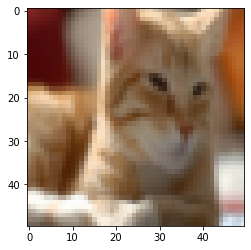

In [357]:
plt.imshow(image[5])
print('Below image is of:',target[5])

Below image is of: dog


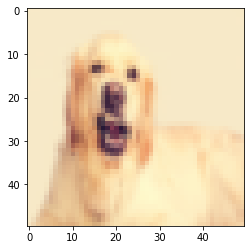

In [360]:
plt.imshow(image[100])
print('Below image is of:',target[100])

# Creating DataFrame

In [7]:
df= pd.DataFrame(data)
df['Target']= target

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.041176,0.015686,0.346667,...,0.084314,0.050980,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cat
1,0.483529,0.364706,0.474510,0.462745,0.368627,0.427843,0.419608,0.405098,0.341961,0.392157,...,0.602353,0.534510,0.405098,0.565882,0.491255,0.350078,0.541176,0.452157,0.296471,cat
2,0.623529,0.592157,0.447059,0.635294,0.603922,0.453451,0.643137,0.611765,0.454902,0.650980,...,0.584902,0.593333,0.539804,0.564431,0.565765,0.507059,0.539255,0.541176,0.475686,cat
3,0.340824,0.401922,0.360431,0.316863,0.390314,0.356078,0.122941,0.195490,0.179804,0.086275,...,0.126863,0.159608,0.176667,0.120118,0.152549,0.168510,0.031725,0.057255,0.078784,cat
4,0.160784,0.113725,0.115451,0.166667,0.121569,0.125490,0.169098,0.125490,0.129412,0.172549,...,0.484314,0.360549,0.297804,0.466667,0.340941,0.278431,0.454902,0.333333,0.274275,cat


In [243]:
df.shape

(200, 7501)

In [9]:
x= df.iloc[:,0:7500].values
y= df.iloc[:,7500].values

In [52]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.3,random_state=100)

In [53]:
print('Length of training data:',len(train_x))
print('Length of testing data:',len(test_x))

Length of training data: 140
Length of testing data: 60


# Checking models-

1. Logistic Regression

In [54]:
model_1= LogisticRegression()
model_1.fit(train_x,train_y)

LogisticRegression()

In [55]:
params_log={'C':[0.01,0.001,0.1,1.0,10,100]}
grid_log= GridSearchCV(model_1,params_log,cv=5)
grid_log.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.001, 0.1, 1.0, 10, 100]})

In [61]:
print("Best score using gridsearchcv:",grid_log.best_score_)

Best score using gridsearchcv: 0.6


In [57]:
y_pred= model_1.predict(test_x)
print('Predicted values using logistic regression-')
y_pred

Predicted values using logistic regression-


array(['cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog',
       'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat',
       'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat',
       'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat',
       'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat',
       'cat', 'cat', 'cat', 'dog', 'dog', 'dog'], dtype=object)

In [59]:
print('accuracy score for logistic regression on testing data:',accuracy_score(test_y,y_pred))

accuracy score for logistic regression on testing data: 0.7


2. SVC

In [35]:
model_2= SVC()
params= {'C':[1,10,100],'kernel':['rbf','linear','polynomial'],'gamma':[0.01,0.001]}
grid= GridSearchCV(model_2,params,cv=5)
grid.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'polynomial']})

In [333]:
df_svc= pd.DataFrame(grid.cv_results_)
df_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.16536,1.248004e-02,0.03744,7.642469e-03,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.535714,0.571429,0.571429,0.571429,0.571429,0.564286,0.014286,2
1,0.14976,1.247994e-02,0.03432,6.239986e-03,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.535714,0.535714,0.535714,0.535714,0.535714,0.535714,0.000000,7
2,0.00624,7.642391e-03,0.00000,0.000000e+00,1,0.01,polynomial,"{'C': 1, 'gamma': 0.01, 'kernel': 'polynomial'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3,0.15600,1.168008e-07,0.04056,7.642411e-03,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.500000,0.642857,0.500000,0.642857,0.607143,0.578571,0.065465,1
4,0.15288,6.240034e-03,0.03120,2.336015e-07,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.535714,0.535714,0.535714,0.535714,0.535714,0.535714,0.000000,7


In [36]:
print('best parameters:',grid.best_params_)
print('best score:',grid.best_score_)

best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
best score: 0.6266666666666666


In [64]:
y_pred_svc= grid.predict(test_x)
accuracy_score(test_y,y_pred_svc)

0.6833333333333333

3. Decision Tree

In [65]:
model_3= DecisionTreeClassifier()
params_dec={'min_samples_split': [2, 3, 4],'max_depth':[4,60,80,100,150,200]}
grid_dec= GridSearchCV(model_3,params_dec,cv=5)
grid_dec.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 60, 80, 100, 150, 200],
                         'min_samples_split': [2, 3, 4]})

In [38]:
print('best parameter:',grid_dec.best_params_)
print('best score:',grid_dec.best_score_)

best parameter: {'max_depth': 100, 'min_samples_split': 4}
best score: 0.52


In [62]:
y_pred1= grid_dec.predict(test_x)
print('accuracy score using decision tree on testing data:', accuracy_score(test_y,y_pred1))

accuracy score using decision tree on testing data: 0.7166666666666667


4. Random Forest

In [40]:
model_4= RandomForestClassifier()
params_1= {'n_estimators': range(100,1000,100)}
grid_2= GridSearchCV(model_4,params_1)
grid_2.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(100, 1000, 100)})

In [339]:
df_rand= pd.DataFrame(grid_2.cv_results_)
df_rand.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.530401,0.009866,0.01560,2.132481e-07,100,{'n_estimators': 100},0.535714,0.642857,0.535714,0.535714,0.464286,0.542857,0.057143,1
1,1.026482,0.011674,0.03120,0.000000e+00,200,{'n_estimators': 200},0.428571,0.500000,0.464286,0.571429,0.607143,0.514286,0.066240,7
2,1.535043,0.012480,0.04368,6.239963e-03,300,{'n_estimators': 300},0.464286,0.571429,0.428571,0.535714,0.607143,0.521429,0.066240,3
3,2.052964,0.025347,0.05928,6.240106e-03,400,{'n_estimators': 400},0.535714,0.571429,0.464286,0.500000,0.535714,0.521429,0.036422,3
4,2.564644,0.025347,0.07176,7.642333e-03,500,{'n_estimators': 500},0.464286,0.535714,0.464286,0.500000,0.535714,0.500000,0.031944,9


In [41]:
print(grid_2.best_params_)
print(grid_2.best_score_)

{'n_estimators': 600}
0.58


In [66]:
y_pred_rand= grid_2.predict(test_x)
print('accuracy score using random forest on testing data:',accuracy_score(test_y,y_pred_rand))

accuracy score using random forest on testing data: 0.6666666666666666


5. Naive Bayes

In [43]:
model_5=GaussianNB()
model_5.fit(train_x,train_y)

GaussianNB()

In [68]:
y_pred3=model_5.predict(test_x)
print("accuracy score on testing data:",accuracy_score(test_y,y_pred3))

accuracy score on testing data: 0.48333333333333334


6. KNeighbors

In [45]:
model_6=KNeighborsClassifier()
model_6.fit(train_x,train_y)

KNeighborsClassifier()

In [46]:
y_pred4=model_6.predict(test_x)
print("accuracy_score using KNeighborsClassifier:",accuracy_score(test_y,y_pred4))

accuracy_score using KNeighborsClassifier: 0.54


USING BOOSTING ALGORITHMS

In [47]:
dt= DecisionTreeClassifier()
clf=  AdaBoostClassifier(n_estimators=100,base_estimator=dt,learning_rate=1)
clf.fit(train_x,train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100)

In [48]:
y_pred_clf= clf.predict(test_x)
accuracy_score(test_y,y_pred_clf)

0.74

In [49]:
clf_2=GradientBoostingClassifier(n_estimators=100)
clf_2.fit(train_x,train_y)
y_pred_clf_2= clf_2.predict(test_x)
accuracy_score(test_y,y_pred_clf_2)

0.66

In [50]:
clf_3=XGBClassifier()
clf_3.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_pred_clf_3= clf_3.predict(test_x)
accuracy_score(test_y,y_pred_clf_3)

0.68

Apart from the boosting algorithms, we found from using best scores of GridSeacrhCV of the remaining algorithms ,SVC has the heighest score.

# Evaluating our model 

In [71]:
cm2=confusion_matrix(test_y,y_pred_svc)
cm2

array([[11,  8],
       [11, 30]], dtype=int64)

<AxesSubplot:>

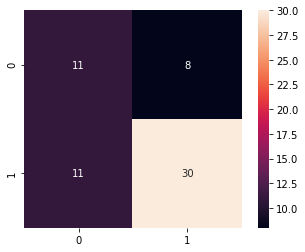

In [72]:
sns.heatmap(cm2,annot=True,square=True)

In [73]:
classification_report(test_y,y_pred,output_dict=True)

{'cat': {'precision': 0.5217391304347826,
  'recall': 0.631578947368421,
  'f1-score': 0.5714285714285715,
  'support': 19},
 'dog': {'precision': 0.8108108108108109,
  'recall': 0.7317073170731707,
  'f1-score': 0.7692307692307694,
  'support': 41},
 'accuracy': 0.7,
 'macro avg': {'precision': 0.6662749706227967,
  'recall': 0.6816431322207959,
  'f1-score': 0.6703296703296704,
  'support': 60},
 'weighted avg': {'precision': 0.7192714453584018,
  'recall': 0.7,
  'f1-score': 0.7065934065934066,
  'support': 60}}

Prediction of a sample image using SVC-

In [74]:
path_2= 'sample.jpg'
i= imread(path_2)
i= resize(i,(50,50,3))
flat= i.flatten()
flat=np.array(flat)

In [75]:
print('Predicted output is:',model_1.predict([flat]))

Predicted output is: ['cat']


Image of our sample input-

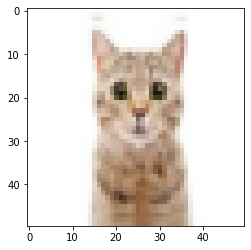

In [76]:
plt.imshow(i)

As the sample image is a cat, this means that our model is working well.